## 1.1 Data Preprocessing

In [1]:
# import required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sys,os
sys.path.append(os.path.abspath(os.path.join('../scripts')))

from preprocessing import Preprocessing
from plot import Plot

import io

import warnings
warnings.filterwarnings('ignore')
import dvc.api

In [2]:
# instantiate Preprocessing object
preprocess = Preprocessing()

# instantiate Plot object
plot = Plot()

In [3]:
# import dvc.api
# # load the dataset
# path = '../data/train.csv'
# repo = 'https://github.com/YohansSamuel/pharmaceutical_sales_prediction'
# rev ='v1'
# data = dvc.api.read(path=path,repo=repo)
# df = pd.read_csv(io.StringIO(data),low_memory=False)

train_df = preprocess.read_csv('../data/train.csv')
store_df = preprocess.read_csv('../data/store.csv')
test_df = preprocess.read_csv('../data/test.csv')

file read as csv
file read as csv
file read as csv


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [7]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [10]:
train_df.shape

(1017209, 9)

In [11]:
store_df.shape

(1115, 10)

In [12]:
test_df.shape

(41088, 8)

In [13]:
# join the store dataframe with the train dataframe
joined_train_df = pd.merge(train_df, store_df, how = 'left', on = 'Store')
joined_test_df = pd.merge(test_df, store_df, how = 'left', on = 'Store')

In [14]:
# Change the date column to datetime
joined_train_df = preprocess.convert_to_datetime(joined_train_df, 'Date')
joined_test_df = preprocess.convert_to_datetime(joined_test_df, 'Date')

In [15]:
# Extract columns from the date column
joined_train_df = preprocess.extract_fields_date(joined_train_df, 'Date')
joined_test_df = preprocess.extract_fields_date(joined_test_df, 'Date')

In [16]:
# diplay information of joined train dataframe
preprocess.get_info(joined_train_df)

Number of rows: 1017209
Number of columns: 24
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object     

((1017209, 24), None)

In [17]:
# diplay information of joined test dataframe
preprocess.get_info(joined_test_df)

Number of rows: 41088
Number of columns: 23
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMon

((41088, 23), None)

In [18]:
# count values
preprocess.get_count(joined_train_df,"PromoInterval")

,PromoInterval
"Jan,Apr,Jul,Oct",293122
"Feb,May,Aug,Nov",118596
"Mar,Jun,Sept,Dec",97460


In [19]:
preprocess.get_count(joined_train_df,"StateHoliday")

,StateHoliday
0,855087
0,131072
a,20260
b,6690
c,4100


In [20]:
# count values
preprocess.get_count(joined_test_df,"PromoInterval")

,PromoInterval
"Jan,Apr,Jul,Oct",13776
"Feb,May,Aug,Nov",5712
"Mar,Jun,Sept,Dec",4368


In [21]:
#Total missing data in percentage
preprocess.percent_missing(joined_train_df)

8.9

In [22]:
# Missing data in the train data in percentage
preprocess.get_missing_data_percentage(joined_train_df)

,Total,%
PromoInterval,508031,49.9
Promo2SinceYear,508031,49.9
Promo2SinceWeek,508031,49.9
CompetitionOpenSinceMonth,323348,31.8
CompetitionOpenSinceYear,323348,31.8
CompetitionDistance,2642,0.3
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0


In [23]:
# Missing data in the test data in percentage
preprocess.get_missing_data_percentage(joined_test_df)

,Total,%
PromoInterval,17232,41.9
Promo2SinceYear,17232,41.9
Promo2SinceWeek,17232,41.9
CompetitionOpenSinceMonth,15216,37.0
CompetitionOpenSinceYear,15216,37.0
CompetitionDistance,96,0.2
Open,11,0.0
Promo2,0,0.0
weekofyear,0,0.0
weekday,0,0.0


#### we have a lot of missing values, therefore we need to handle those missing values accordingly


In [24]:
missing_df = joined_train_df[['PromoInterval', 'Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance', 'Open']]
missing_df.head(10)

,PromoInterval,Promo2SinceYear,Promo2SinceWeek,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionDistance,Open
0,NaN,NaN,NaN,9.0,2008.0,1270.0,1
1,"Jan,Apr,Jul,Oct",2010.0,13.0,11.0,2007.0,570.0,1
2,"Jan,Apr,Jul,Oct",2011.0,14.0,12.0,2006.0,14130.0,1
3,NaN,NaN,NaN,9.0,2009.0,620.0,1
4,NaN,NaN,NaN,4.0,2015.0,29910.0,1
5,NaN,NaN,NaN,12.0,2013.0,310.0,1
6,NaN,NaN,NaN,4.0,2013.0,24000.0,1
7,NaN,NaN,NaN,10.0,2014.0,7520.0,1
8,NaN,NaN,NaN,8.0,2000.0,2030.0,1
9,NaN,NaN,NaN,9.0,2009.0,3160.0,1


In [25]:


miss_1 = ['Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance']
joined_train_df = preprocess.fill_missing_median(joined_train_df, miss_1)
joined_test_df = preprocess.fill_missing_median(joined_test_df, miss_1)

In [26]:

joined_train_df = preprocess.fill_missing_mode(joined_train_df, ['PromoInterval'])
joined_test_df = preprocess.fill_missing_mode(joined_test_df, ['PromoInterval'])

In [27]:

# fill the values of 'open' in joined test data with the value of '0'
joined_test_df = preprocess.fill_missing_with_zero(joined_test_df, ['Open'])

In [28]:
# Missing data in the train data in percentage
preprocess.get_missing_data_percentage(joined_train_df)

,Total,%
Store,0,0.0
DayOfWeek,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0
Promo2SinceWeek,0,0.0


In [29]:
# Missing data in the test data in percentage
preprocess.get_missing_data_percentage(joined_test_df)

,Total,%
Id,0,0.0
CompetitionOpenSinceYear,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0
Promo2SinceWeek,0,0.0


### Check for outliers and handling them

In [30]:
joined_train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day', 'weekday',
       'weekofyear', 'weekend'],
      dtype='object')

In [31]:
columns = ['Sales', 'Customers']
preprocess.getOverview(joined_train_df[columns])

,number_of_outliers,percentage_of_outliers,skew,Q1,Median,Q3
label,,,,,,
Sales,26694,2.62%,0.64146,3727.0,5744.0,7856.0
Customers,38095,3.75%,1.59865,405.0,609.0,837.0


--- Logging error ---
Traceback (most recent call last):
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/y

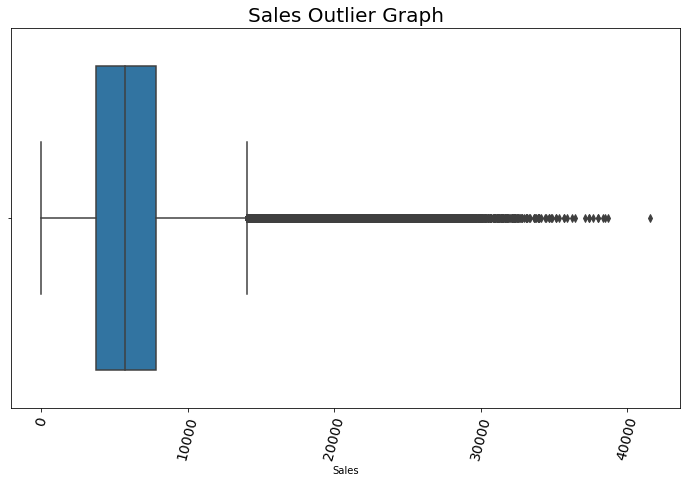

--- Logging error ---
Traceback (most recent call last):
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/y

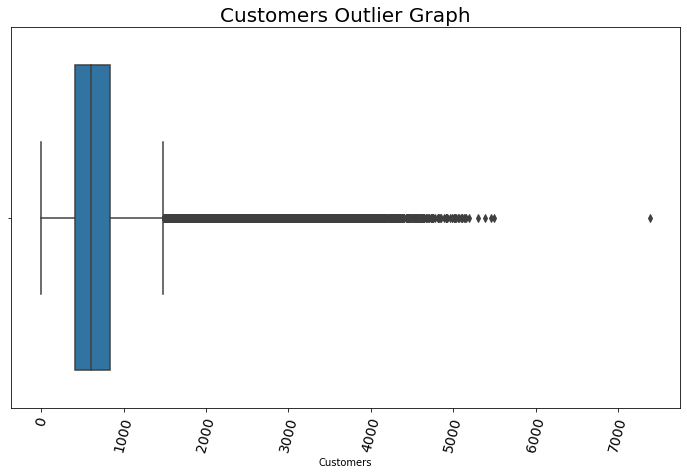

In [32]:

plot.plot_box(joined_train_df, joined_train_df['Sales'], "Sales Outlier Graph") 
plot.plot_box(joined_train_df, joined_train_df['Customers'], "Customers Outlier Graph")

--- Logging error ---
Traceback (most recent call last):
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/y

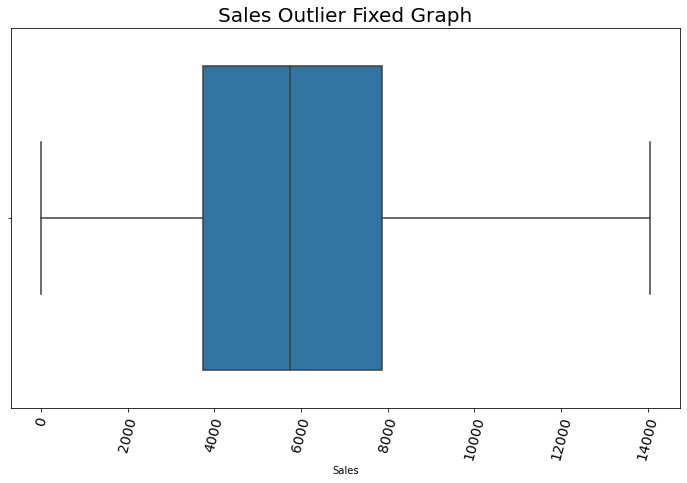

--- Logging error ---
Traceback (most recent call last):
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/yohans/anaconda3/envs/sales_prediction/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/y

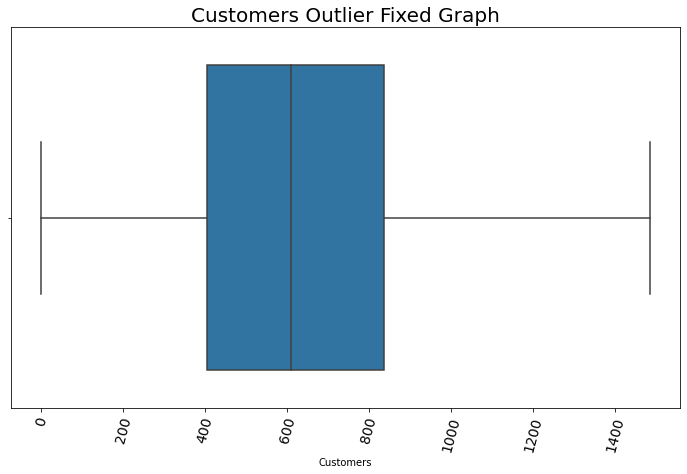

In [33]:
# remove outliers in the sales column
preprocess.replace_outliers_with_iqr(joined_train_df,['Sales', 'Customers'])
# display it in the graph
plot.plot_box(joined_train_df, joined_train_df['Sales'], "Sales Outlier Fixed Graph") 
plot.plot_box(joined_train_df, joined_train_df['Customers'], "Customers Outlier Fixed Graph")

In [34]:
# Label Encoding
categorical_columns = ['PromoInterval', 'Assortment', 'StoreType']

label_encoded_columns = preprocess.label_encode(joined_train_df, categorical_columns)

In [35]:
# merge the label encoded columns with our dataframe
joined_train_df.drop(categorical_columns, axis=1, inplace=True)
joined_train_df = pd.concat([joined_train_df, label_encoded_columns], axis=1)

In [36]:
preprocess.get_info(joined_train_df)

Number of rows: 1017209
Number of columns: 24
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Customers                  1017209 non-null  float64       
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   CompetitionDistance        1017209 non-null  float64       
 10  CompetitionOpenSinceMonth  1017209 non-null  float64    

((1017209, 24), None)

In [37]:
# calcualte correlation matrix of the 'sales' target variable
corr_matrix = joined_train_df.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.920805
Open                         0.715977
Promo                        0.468557
SchoolHoliday                0.088484
Assortment                   0.074635
weekofyear                   0.050223
Month                        0.045805
Promo2SinceWeek              0.033582
Year                         0.025718
CompetitionOpenSinceYear     0.008260
Store                        0.003404
Promo2SinceYear             -0.004713
PromoInterval               -0.004929
StoreType                   -0.004961
Day                         -0.011411
CompetitionDistance         -0.012095
CompetitionOpenSinceMonth   -0.020931
Promo2                      -0.084233
weekend                     -0.279645
DayOfWeek                   -0.481886
weekday                     -0.481886
Name: Sales, dtype: float64

In [38]:
# write the joined train dataframe into a csv
preprocess.save_csv(joined_train_df,"../data/joined_train.csv")
joined_train_df.head()

File Successfully Saved.!!!


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,Promo2SinceYear,Year,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType
0,1,4,2015-07-31,5263.0,555.0,1,1,0,1,1270.0,...,2012.0,2015,7,31,4,31,0,1,0,2
1,2,4,2015-07-31,6064.0,625.0,1,1,0,1,570.0,...,2010.0,2015,7,31,4,31,0,1,0,0
2,3,4,2015-07-31,8314.0,821.0,1,1,0,1,14130.0,...,2011.0,2015,7,31,4,31,0,1,0,0
3,4,4,2015-07-31,13995.0,1485.0,1,1,0,1,620.0,...,2012.0,2015,7,31,4,31,0,1,2,2
4,5,4,2015-07-31,4822.0,559.0,1,1,0,1,29910.0,...,2012.0,2015,7,31,4,31,0,1,0,0


In [39]:
# write the joined test dataframe into a csv
preprocess.save_csv(joined_test_df,"../data/joined_test.csv")
joined_test_df.head()

File Successfully Saved.!!!


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
0,1,1,3,2015-09-17,1.0,1,0,0,c,a,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,9,17,3,38,0
1,2,3,3,2015-09-17,1.0,1,0,0,a,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,3,38,0
2,3,7,3,2015-09-17,1.0,1,0,0,a,c,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,9,17,3,38,0
3,4,8,3,2015-09-17,1.0,1,0,0,a,a,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,9,17,3,38,0
4,5,9,3,2015-09-17,1.0,1,0,0,a,c,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,9,17,3,38,0


## 1.2 Exploratory Data Analysis

In [40]:
# read data from dvc
# df = preprocess.get_data_from_dvc('V2-train')

In [41]:
joined_train_df.sort_values(["Store","Date"], ignore_index=True, inplace=True)
joined_test_df.sort_values(["Store","Date"], ignore_index=True, inplace=True)
joined_train_df.set_index('Date', inplace=True)
joined_test_df.set_index('Date', inplace=True)

In [42]:
joined_train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,Year,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,0.0,0.0,0,0,a,1,1270.0,9.0,...,2012.0,2013,1,1,1,1,0,1,0,2
2013-01-02,1,2,5530.0,668.0,1,0,0,1,1270.0,9.0,...,2012.0,2013,1,2,2,1,0,1,0,2
2013-01-03,1,3,4327.0,578.0,1,0,0,1,1270.0,9.0,...,2012.0,2013,1,3,3,1,0,1,0,2
2013-01-04,1,4,4486.0,619.0,1,0,0,1,1270.0,9.0,...,2012.0,2013,1,4,4,1,0,1,0,2
2013-01-05,1,5,4997.0,635.0,1,0,0,1,1270.0,9.0,...,2012.0,2013,1,5,5,1,1,1,0,2


In [43]:
joined_test_df.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-01,40233,1,5,1.0,0,0,1,c,a,1270.0,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,8,1,5,31,1
2015-08-02,39377,1,6,0.0,0,0,1,c,a,1270.0,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,8,2,6,31,1
2015-08-03,38521,1,0,1.0,1,0,1,c,a,1270.0,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,8,3,0,32,1
2015-08-04,37665,1,1,1.0,1,0,1,c,a,1270.0,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,8,4,1,32,0
2015-08-05,36809,1,2,1.0,1,0,1,c,a,1270.0,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,8,5,2,32,0


###  Non - Graphical - Analysis

In [44]:
joined_train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,2.998341,1.997391,0.0,1.0,3.0,5.0,6.0
Sales,1017209.0,5690.812276,3595.807489,0.0,3727.0,5744.0,7856.0,14049.5
Customers,1017209.0,611.155962,388.620282,0.0,405.0,609.0,837.0,1485.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1017209.0,5422.033790,7706.913044,20.0,710.0,2330.0,6880.0,75860.0
CompetitionOpenSinceMonth,1017209.0,7.469899,2.677243,1.0,6.0,8.0,9.0,12.0
CompetitionOpenSinceYear,1017209.0,2009.106575,4.986802,1900.0,2008.0,2010.0,2011.0,2015.0


In [45]:
# display top 6 features that have high correlation with sales
# preprocess.correlation_map(joined_train_df,'Sales',6)

##### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. 
* a = public holiday 
* b = Easter holiday 
* c = Christmas 
* 0 = None

Text(0.5, 1.0, 'State holidays value counts')

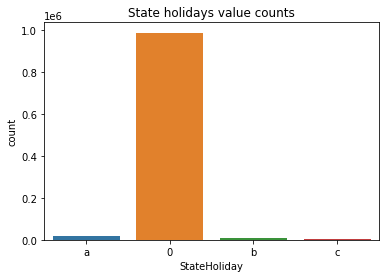

In [46]:
joined_train_df['StateHoliday'].loc[joined_train_df['StateHoliday'] == 0] = "0"
sns.countplot(x='StateHoliday', data=joined_train_df).set_title('State holidays value counts')

#### Sales on State Holidays vs ordinary days and during state holidays


Text(0.5, 1.0, 'sales during Stateholidays')

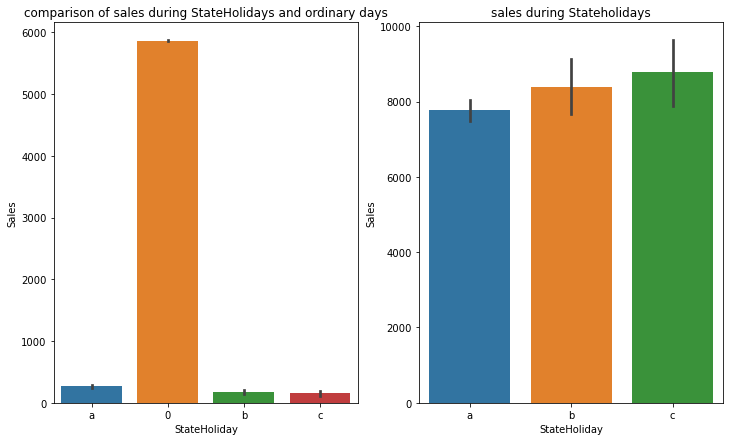

In [47]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,7))

sns.barplot(x='StateHoliday', y='Sales', data=joined_train_df, ax=axis1).set_title('comparison of sales during StateHolidays and ordinary days')

# holidays only
mask = (joined_train_df["StateHoliday"] != "0") & (joined_train_df["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=joined_train_df[mask], ax=axis2).set_title('sales during Stateholidays')

#### Customers on different stores

Text(0.5, 1.0, 'a count plot of StoreTypes')

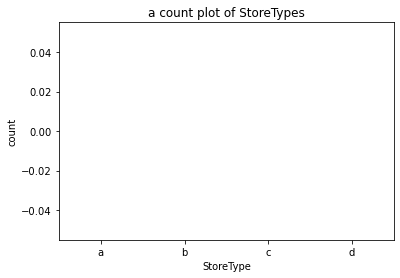

In [48]:
sns.countplot(x='StoreType', data=joined_train_df, order=['a','b','c', 'd']).set_title('a count plot of StoreTypes')

Text(0.5, 1.0, 'no of customers across diffrent')

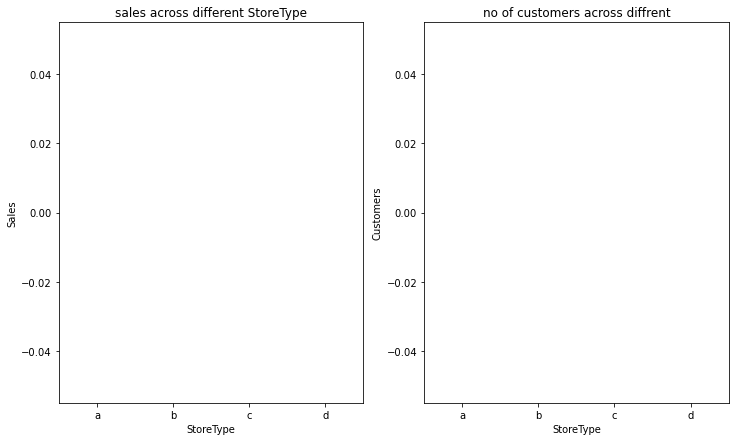

In [49]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,7))
sns.barplot(x='StoreType', y='Sales', data=joined_train_df, ax=axis1, order=['a','b','c', 'd']).set_title('sales across different StoreType')
sns.barplot(x='StoreType', y='Customers', data=joined_train_df, ax=axis2, order=['a','b','c', 'd']).set_title('no of customers across diffrent')

#### Assortment - describes an assortment level: a = basic, b = extra, c = extended. 

Text(0.5, 1.0, 'assortment types counts')

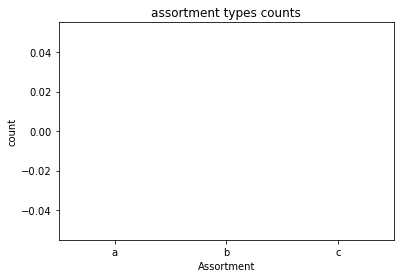

In [50]:
sns.countplot(x='Assortment', data=joined_train_df, order=['a','b','c'], palette = 'husl').set_title('assortment types counts')

Text(0.5, 1.0, 'customers across different assortment types')

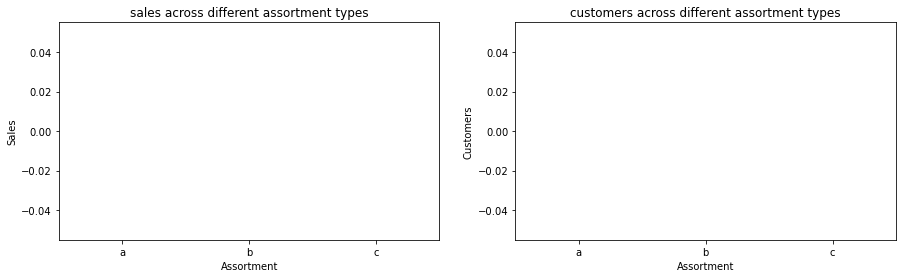

In [51]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=joined_train_df, palette = 'husl', order=['a','b','c'], ax=axis1).set_title('sales across different assortment types')
sns.barplot(x='Assortment', y='Customers', data=joined_train_df, palette = 'husl', order=['a','b','c'], ax=axis2).set_title('customers across different assortment types')


#### Days of week

Text(0.5, 1.0, "store's open status in relation to day of the week")

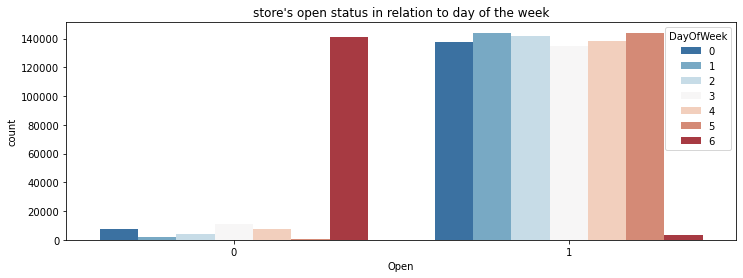

In [52]:
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
sns.countplot(x='Open',hue='DayOfWeek', data=joined_train_df, ax=axis1, palette = 'RdBu_r')
plt.title("store's open status in relation to day of the week")

Text(0.5, 1.0, 'customers across different days of the week ')

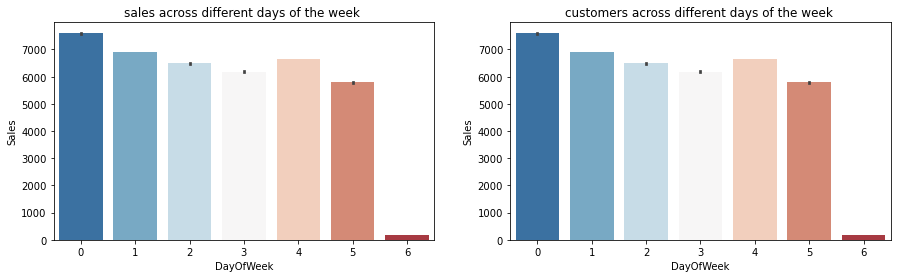

In [53]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=joined_train_df, palette = 'RdBu_r', ax=axis1).set_title('sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Sales', data=joined_train_df, palette = 'RdBu_r', ax=axis2).set_title('customers across different days of the week ')


#### Sales on weekdays vs weekends

Text(0.5, 1.0, 'a count plot of weekday')

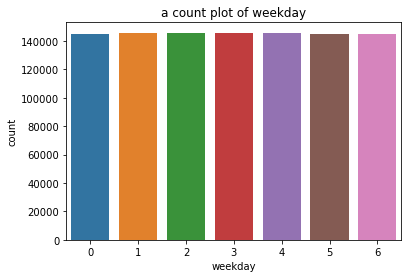

In [54]:
sns.countplot(x='weekday', data=joined_train_df).set_title('a count plot of weekday')

Text(0.5, 1.0, 'customers during weekends and weekdays')

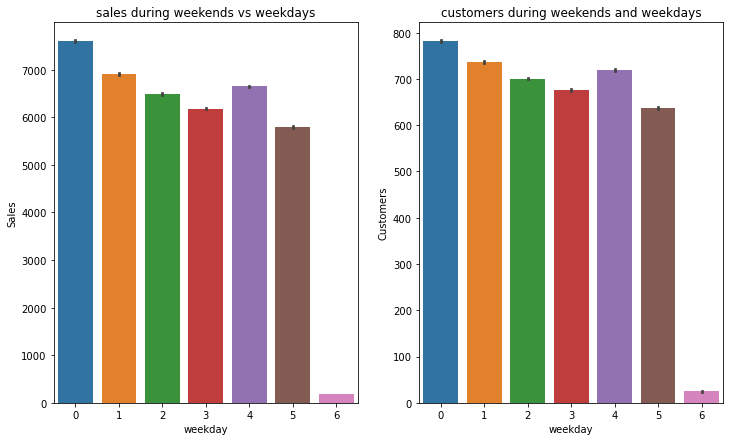

In [55]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,7))

sns.barplot(x='weekday', y='Sales', data=joined_train_df, ax=axis1).set_title('sales during weekends vs weekdays')
sns.barplot(x='weekday', y='Customers', data=joined_train_df, ax=axis2).set_title('customers during weekends and weekdays')


### Sales vs Promo

Text(0.5, 1.0, 'Promo counts')

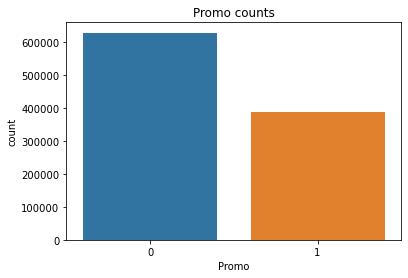

In [56]:
sns.countplot(x='Promo', data=joined_train_df).set_title('Promo counts')

Text(0.5, 1.0, 'customers across different Promo')

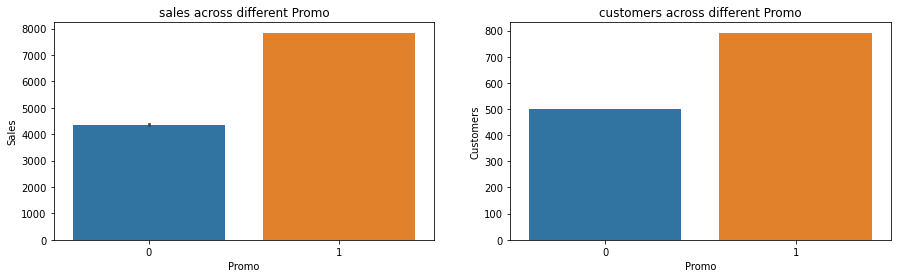

In [57]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=joined_train_df, ax=axis1).set_title('sales across different Promo')
sns.barplot(x='Promo', y='Customers', data=joined_train_df, ax=axis2).set_title('customers across different Promo')

#### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Text(0.5, 1.0, 'Promo2 counts')

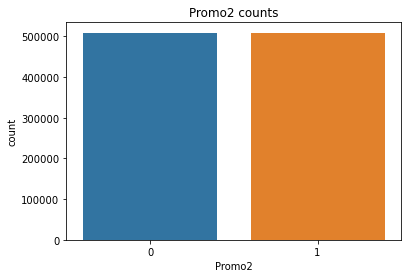

In [58]:
sns.countplot(x='Promo2', data=joined_train_df).set_title('Promo2 counts')

Text(0.5, 1.0, 'customers across different Promo2')

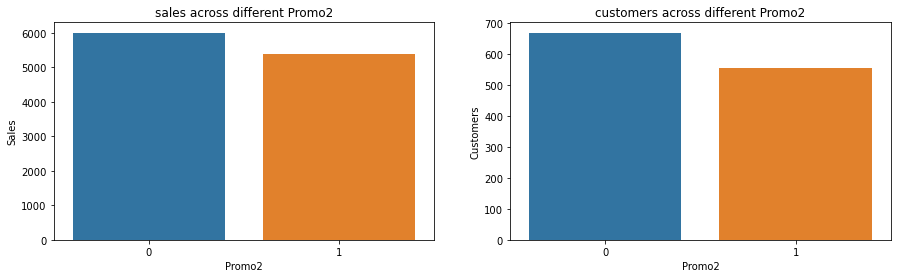

In [59]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo2', y='Sales', data=joined_train_df, ax=axis1).set_title('sales across different Promo2')
sns.barplot(x='Promo2', y='Customers', data=joined_train_df, ax=axis2).set_title('customers across different Promo2')

#### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. 
* E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Text(0.5, 1.0, 'PromoInterval value counts')

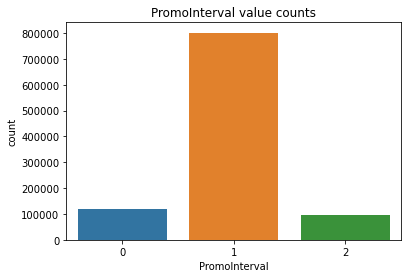

In [60]:
sns.countplot(x='PromoInterval', data=joined_train_df).set_title('PromoInterval value counts')

Text(0.5, 1.0, 'customers across different promo intervals')

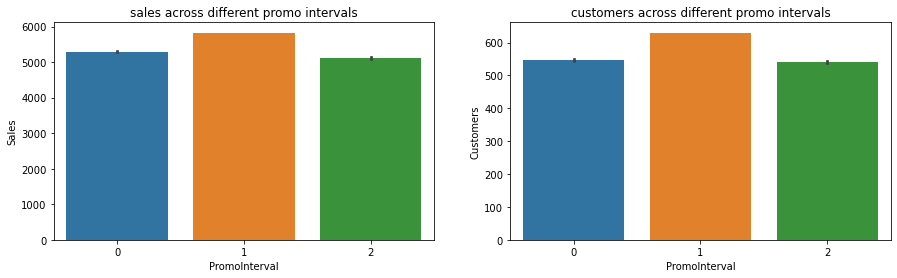

In [61]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='PromoInterval', y='Sales', data=joined_train_df, ax=axis1).set_title('sales across different promo intervals')
sns.barplot(x='PromoInterval', y='Customers', data=joined_train_df, ax=axis2).set_title('customers across different promo intervals')

#### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

Text(0.5, 1.0, 'a count plot of school holidays')

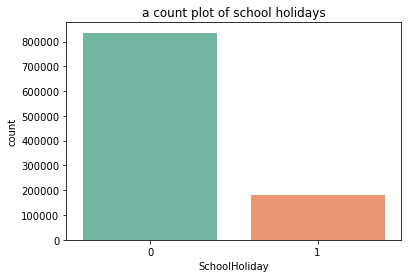

In [62]:
sns.countplot(x='SchoolHoliday', data=joined_train_df, palette = 'Set2').set_title('a count plot of school holidays')

Text(0.5, 1.0, 'no of customers across ordinary school days and school holidays')

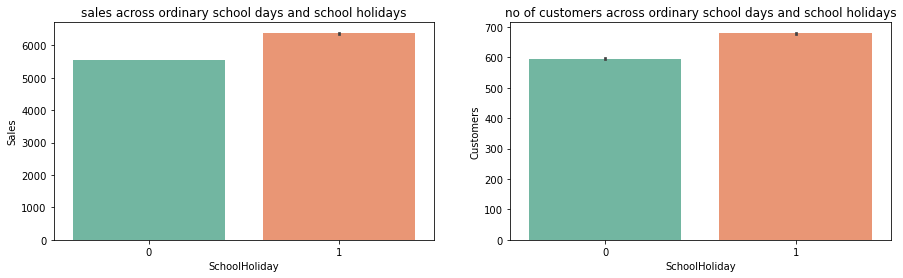

In [63]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=joined_train_df, ax=axis1, palette = 'Set2').set_title('sales across ordinary school days and school holidays')
sns.barplot(x='SchoolHoliday', y='Customers', data=joined_train_df, ax=axis2, palette = 'Set2').set_title('no of customers across ordinary school days and school holidays')

#### CompetitionDistance - distance in meters to the nearest competitor store

Text(0.5, 1.0, 'A piechart indicating mean sales in the 5 competition distance decile classes')

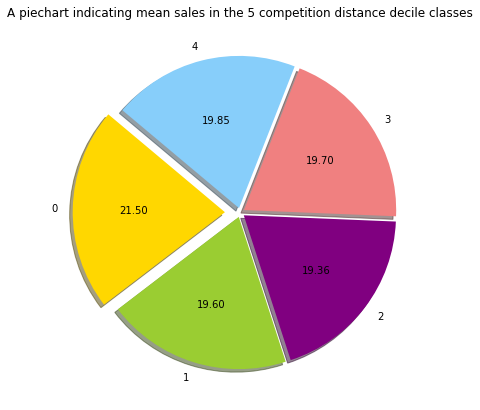

In [64]:
joined_train_df['Decile_rank'] = pd.qcut(joined_train_df['CompetitionDistance'], 5, labels = False)
new_df = joined_train_df[['Decile_rank', 'Sales']]

a = new_df.groupby('Decile_rank').mean()
labels = a.index.to_list()
sizes = a.Sales.to_list()
fig = plt.figure(figsize =(10, 7))
colors = ['gold', 'yellowgreen', 'purple', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.03, 0.03, 0.03, 0.03)  

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, autopct='%.2f', startangle=140)
plt.title('A piechart indicating mean sales in the 5 competition distance decile classes')

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Density'>

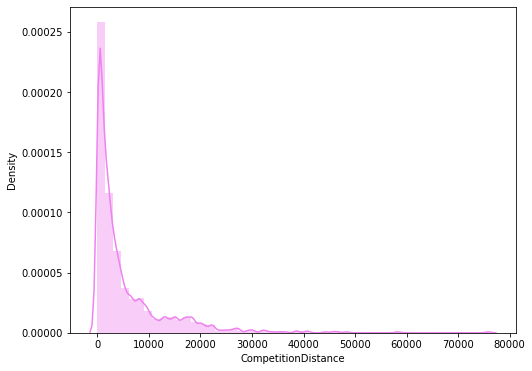

In [65]:
fig = plt.figure(figsize = (8,6))
sns.distplot(joined_train_df.CompetitionDistance, color = 'violet')

#### Seasonality

In [66]:
# time_data = joined_train_df[['Date', 'Sales']]
# time_data['datetime'] = pd.to_datetime(time_data['Date'])
# time_data = time_data.set_index('datetime')
# time_data = time_data.drop(['Date'], axis = 1)

#### Sales Distribution

[Text(0.5, 1.0, 'sales distribution')]

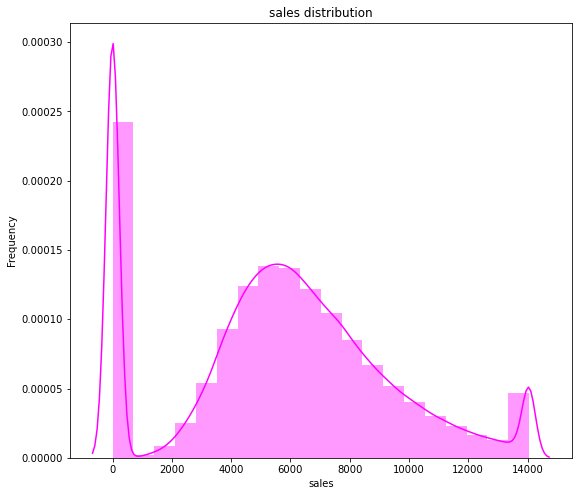

In [67]:
f, ax = plt.subplots(figsize=(9, 8))
sns.distplot(joined_train_df['Sales'], bins = 20, color = 'Magenta')
ax.set(ylabel="Frequency")
ax.set(xlabel="sales")
ax.set(title="sales distribution")

[Text(0.5, 1.0, 'Promo distribution')]

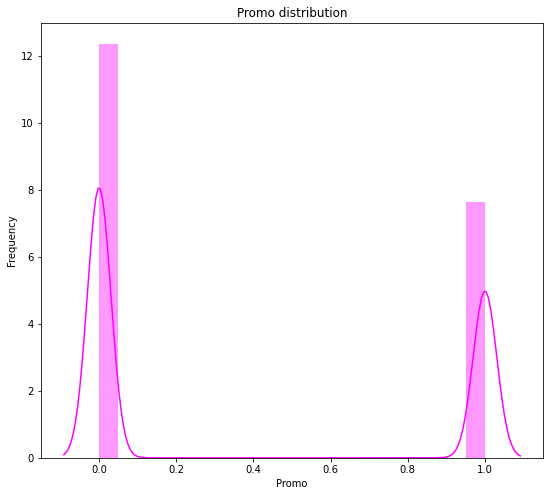

In [68]:
f, ax = plt.subplots(figsize=(9, 8))
sns.distplot(joined_train_df['Promo'], bins = 20, color = 'Magenta')
ax.set(ylabel="Frequency")
ax.set(xlabel="Promo")
ax.set(title="Promo distribution")

[Text(0.5, 1.0, 'Promo distribution')]

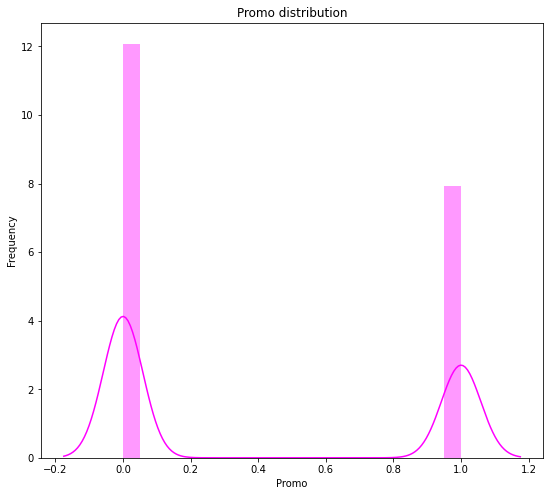

In [69]:
f, ax = plt.subplots(figsize=(9, 8))
sns.distplot(joined_test_df['Promo'], bins = 20, color = 'Magenta')
ax.set(ylabel="Frequency")
ax.set(xlabel="Promo")
ax.set(title="Promo distribution")

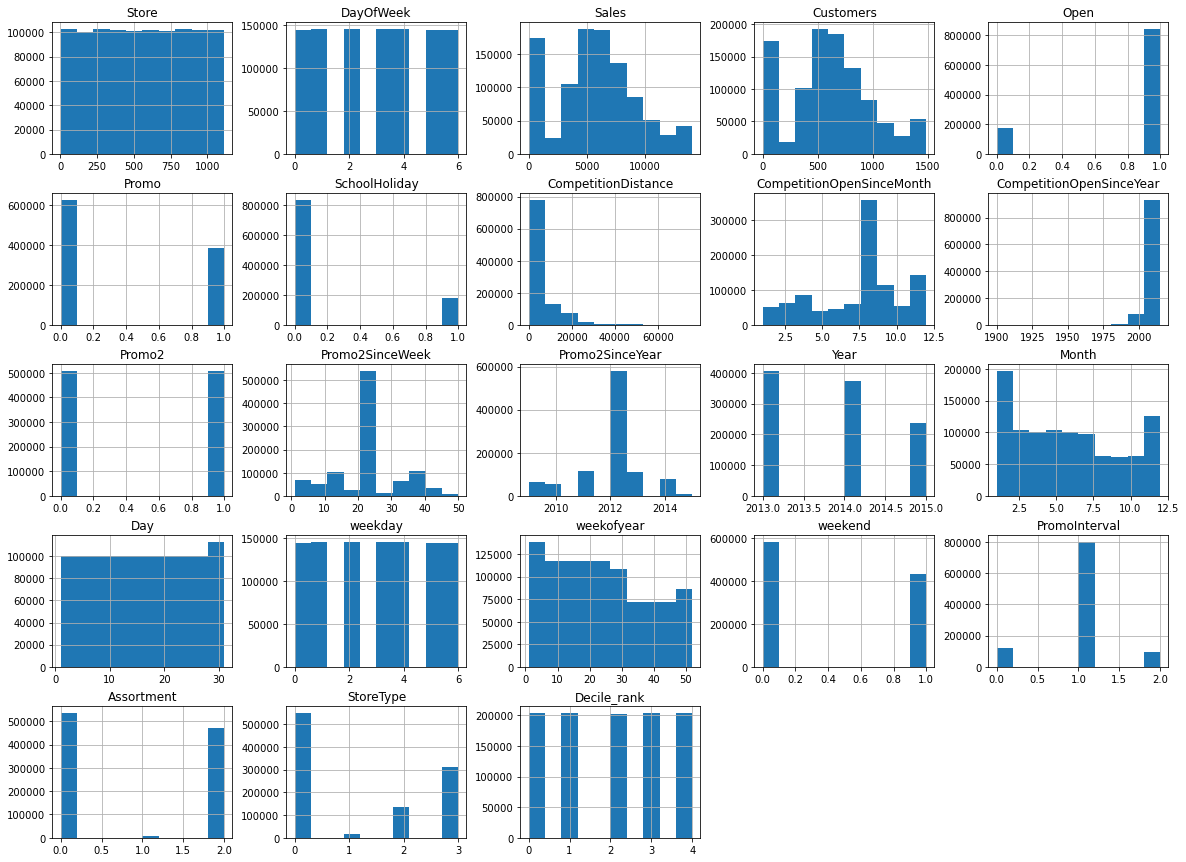

In [70]:
plot.plot_distributions(joined_train_df)

In [71]:
preprocess.save_csv(joined_train_df,"../data/cleaned_train.csv")
preprocess.save_csv(joined_test_df,"../data/cleaned_test.csv")

File Successfully Saved.!!!
File Successfully Saved.!!!


,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-01,40233,1,5,1.0,0,0,1,c,a,1270.0,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,8,1,5,31,1
2015-08-02,39377,1,6,0.0,0,0,1,c,a,1270.0,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,8,2,6,31,1
2015-08-03,38521,1,0,1.0,1,0,1,c,a,1270.0,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,8,3,0,32,1
2015-08-04,37665,1,1,1.0,1,0,1,c,a,1270.0,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,8,4,1,32,0
2015-08-05,36809,1,2,1.0,1,0,1,c,a,1270.0,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,8,5,2,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-13,4280,1115,6,0.0,0,0,0,d,c,5350.0,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2015,9,13,6,37,1
2015-09-14,3424,1115,0,1.0,1,0,0,d,c,5350.0,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2015,9,14,0,38,1
2015-09-15,2568,1115,1,1.0,1,0,0,d,c,5350.0,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2015,9,15,1,38,0
